In [1]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import math

'1544582648735466220.png'

In [6]:
a = np.array([[1,1,2],[1,2,3],[2,3,3]])
np.where(a != 0)

(array([0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2, 0, 1, 2]))

In [96]:
data_lidar_file = os.path.abspath("Lidar/lidar.csv")
with open(data_lidar_file) as f:
    lidar_data = np.loadtxt(f, delimiter = ',')
timestamp = lidar_data[:,0]
lidar_data = lidar_data[:,1:]

In [95]:
total_t = timestamp[len(timestamp)-1] - timestamp[0]
total_t * pow(10,-8)

11604.41478656

In [54]:
# transform lidar points from lidar frame to world frame
s_R_v = np.array([[0.00130201,0.796097,0.605167], [0.999999,-0.000419027,-0.00160026], [-0.00102038,0.605169,-0.796097]])
s_p_v = np.array([0.8349,-0.0126869,1.76416])

In [6]:
angles = np.linspace(-5, 185, 286) / 180 * np.pi
ranges = lidar_data[0, :]

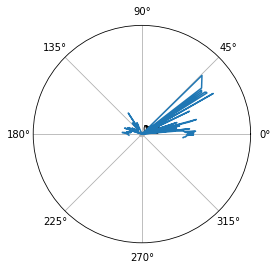

In [7]:
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(angles, ranges)
ax.set_rmax(80)
ax.set_rticks([0.5, 1, 1.5, 2])  # fewer radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line

In [23]:
x = np.array([ranges[i] * math.cos(angles[i]) for i in range(len(angles))])
y = np.array([ranges[i] * math.sin(angles[i]) for i in range(len(angles))])
z = np.zeros(len(x))

lidar_end = np.array([x,y,z,np.ones(len(x))])

In [53]:
b = 0.1


def bodyToWorldTransform(x, y, yaw):
    R = rot_z(yaw)

    w_T_b = np.vstack((R, np.zeros((1,3))))
    w_T_b = np.hstack((w_T_b, np.array(([x], [y], [b], [1]))))
    return w_T_b

def lidarToBodyTransform(psi, theta):
    b_T_h = headToBodyTransform(psi, theta)
    h_T_l = lidarToHeadTransform()

    b_T_l = np.matmul(b_T_h, h_T_l)
    return b_T_l

def lidar2body(psi, theta, x_l, y_l):
    coordinates_l = np.vstack((np.vstack((x_l, y_l)), np.zeros((1, x_l.shape[1])), np.ones((1, x_l.shape[1]))))

    coordinates_b = np.matmul(lidarToBodyTransform(psi, theta), coordinates_l)
    x_b = coordinates_b[0, :]
    y_b = coordinates_b[1, :]
    return (x_b, y_b)

In [42]:
s_R_v = np.array([[0.00130201, 0.796097, 0.605167],
                    [0.999999, -0.000419027, -0.00160026],
                    [-0.00102038, 0.605169, -0.796097]
                    ])
s_p_v = np.array([0.8349, -0.0126869, 1.76416])

v_T_s = np.vstack((s_R_v.T, np.zeros((1,3))))
v_T_s = np.hstack((v_T_s, np.array([np.append(s_R_v.T.dot(s_p_v),1),]).T))

In [14]:
l_R_v = np.array([[0.00130201, 0.796097, 0.605167],
                    [0.999999, -0.000419027, -0.00160026],
                    [-0.00102038, 0.605169, -0.796097]
                    ])
l_p_v = np.array([[0.8349, -0.0126869, 1.76416, 1]])

v_T_l = np.vstack([l_R_v, np.zeros(3)])
v_T_l = np.hstack([v_T_l, l_p_v.T])

In [57]:
v_T_s = np.hstack([s_R_v.T,np.array([-s_R_v.T.dot(s_p_v),]).T])
v_T_s = np.vstack([v_T_s, [0,0,0,1]])
lidar_end_v = np.matmul(v_T_s, lidar_end)

In [3]:
data_fog_file = os.path.abspath("FOG/fog.csv")
with open(data_fog_file) as f:
    fog_data = np.loadtxt(f, delimiter = ',')
fog_data = fog_data[:,1:]
fog_timestamp = fog_data[:,0]

In [91]:
total_t = timestamp[len(timestamp)-1] - timestamp[0]
total_t * pow(10,-8)

11604.762176

In [84]:
# the change of orientation in fog frame is the same as in vehicle frame
yaw_v = fog_data[:,2]

In [2]:
# x, y of vehicle obtained from encoder
data_encoder_file = os.path.abspath("Encoder/encoder.csv")
with open(data_encoder_file) as f:
    encoder_data = np.loadtxt(f, delimiter = ',')
encoder_timestamp = encoder_data[:,0]
encoder_data = encoder_data[:,1:]

In [22]:
u_t = 5
x_t = np.array([0,0,3.14])
w_t = 2
np.vstack([np.array([[u_t * math.cos(x_t[2]),u_t * math.sin(x_t[2])],]).T, w_t])

array([[-4.99999366],
       [ 0.00796326],
       [ 2.        ]])

In [20]:
np.array([[u_t * math.cos(x_t[2]),u_t * math.sin(x_t[2])],]).T.shape

(2, 1)

In [116]:
fog_timestamp[0] > encoder_timestamp

array([False, False, False, ..., False, False, False])

In [105]:
fog_timestamp[0] < encoder_timestamp[0]

True

In [93]:
total_t = timestamp[len(timestamp)-1] - timestamp[0]
total_t * pow(10,-8)

11604.762176

In [83]:
l_wheel_d = 0.623479
traveled_dist = [math.pi * l_wheel_d / 360 * count for count in encoder_data[:,0]]
